## Let's analyze each column

- what is the unique values
- what are the value range
- how many empty values

In [33]:
import pandas as pd
from sigfig import round
pd.set_option('display.max_colwidth', None)
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [34]:
data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [35]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [36]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [37]:
# show all lines in test data where 'MSZoning' is missing
test_data[test_data['MSZoning'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,...,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
756,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
790,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
1444,2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


In [38]:
def summarize(col):
    output = set(col)
    if len(output) <= 20:
        counts = col.value_counts()
        output = [f"{val} ({count})" for val, count in zip(counts.index, counts)]
        nulls = col.isna().sum()
        if nulls:
            output.append(f"None ({nulls})")
        return output
    output = sorted(set(map(str, col)))
    return f'{output[:3] + ["...", max(col), min(col), "..."] + output[-3:]}, Null count: {col.isna().sum()}/{len(col)}'

one_hots = set(["LotConfig", "Neighborhood", "BldgType", "RoofStyle", "RoofMatl", "Exterior1st", "MasVnrType", "Foundation", "Heating", "GarageType", "Fence", "SaleType", "SaleCondition"])

show_all = True
for n in range(len(data.columns) - 1):
    if not show_all and data.columns[n] not in one_hots:
        continue
    print(f"{data.columns[n]}:".ljust(13), summarize(data[data.columns[n]]))
    print("test ".rjust(13), summarize(test_data[data.columns[n]]))

Id:           ['1', '10', '100', '...', 1460, 1, '...', '997', '998', '999'], Null count: 0/1460
        test  ['1461', '1462', '1463', '...', 2919, 1461, '...', '2917', '2918', '2919'], Null count: 0/1459
MSSubClass:   ['20 (536)', '60 (299)', '50 (144)', '120 (87)', '30 (69)', '160 (63)', '70 (60)', '80 (58)', '90 (52)', '190 (30)', '85 (20)', '75 (16)', '45 (12)', '180 (10)', '40 (4)']
        test  ['20 (543)', '60 (276)', '50 (143)', '120 (95)', '30 (70)', '70 (68)', '160 (65)', '80 (60)', '90 (57)', '190 (31)', '85 (28)', '75 (7)', '180 (7)', '45 (6)', '40 (2)', '150 (1)']
MSZoning:     ['RL (1151)', 'RM (218)', 'FV (65)', 'RH (16)', 'C (all) (10)']
        test  ['RL (1114)', 'RM (242)', 'FV (74)', 'C (all) (15)', 'RH (10)', 'None (4)']
LotFrontage:  ['100.0', '101.0', '102.0', '...', 313.0, 21.0, '...', '98.0', '99.0', 'nan'], Null count: 259/1460
        test  ['100.0', '101.0', '102.0', '...', 200.0, 21.0, '...', '98.0', '99.0', 'nan'], Null count: 227/1459
LotArea:      ['10

In [39]:
def values(data, column):
    output = set(data[data.columns[column]].value_counts().index)
    if data[data.columns[column]].isna().sum():
        output.add(None)
    return output

for n in range(len(data.columns) - 1):
# for n in range(4):
    in_both = values(data, n) & values(test_data, n)
    print(f"{data.columns[n]} - both:".ljust(20), sorted(in_both, key=lambda x: (x is None, x)))
    print("only train ".rjust(20), sorted(values(data, n).difference(in_both), key=lambda x: (x is None, x)))
    print( "only test ".rjust(20), sorted(values(test_data, n).difference(in_both), key=lambda x: (x is None, x)))

Id - both:           []
         only train  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 21

In [40]:
list(zip(data[data.columns[3]].value_counts().index, data[data.columns[3]].value_counts()))[-5:]

[(182.0, 1), (160.0, 1), (152.0, 1), (153.0, 1), (46.0, 1)]

/home/mike/kaggle/.venv/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6626: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/home/mike/kaggle/.venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


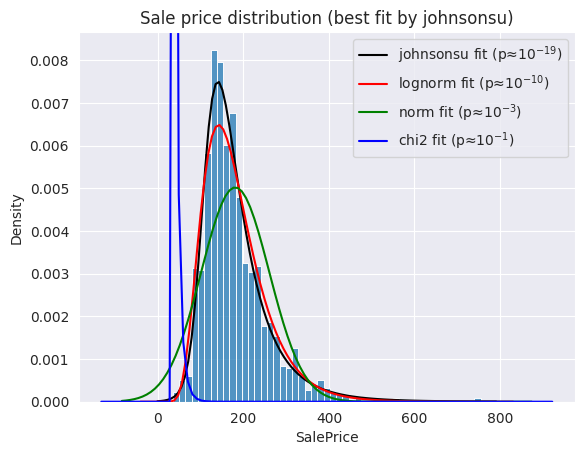

In [41]:
from numpy import linspace, log10
from seaborn import histplot, set_style
from scipy.stats import johnsonsu, lognorm, norm, chi2, ks_1samp
from matplotlib.pyplot import plot
set_style("darkgrid")

base_plot = histplot(data['SalePrice']/1000, stat='density')
price_distribution = [patch.get_height() for patch in base_plot.patches]
y_lim = base_plot.get_ylim()

best_fit = {"name": None, "p": 1}
for fit, color in [(johnsonsu, 'k'), (lognorm, 'r'), (norm, "g"), (chi2, "b")]:
    x = linspace(*base_plot.get_xlim(), 100)
    y = fit.pdf(x, *fit.fit(data['SalePrice']/1000))
    p = ks_1samp(price_distribution, fit(*fit.fit(price_distribution)).cdf).pvalue
    if p < best_fit["p"]:
        best_fit = {"name": fit.name, "p": p}

    plot(x, y, color=color, label=f"{fit.name} fit (p≈$10^{{{int(log10(p))}}}$)")

base_plot.legend()
base_plot.set_ylim(y_lim)
base_plot.set_title(f"Sale price distribution (best fit by {best_fit['name']})")
None

In [42]:
# look for garages with inconsistent data
from itertools import chain
garage_fields = [g for g in test_data.keys() if "Gar" in g or "gar" in g] + ["Id"]
for id, row in chain(test_data[garage_fields].iterrows(), data[garage_fields].iterrows()):
    if row.isnull().any():
        if any([type(i) == str for i in row]) or any([i > 0 if type(i) in [float, int] and key != "Id" else False for key, i in row.items()]):
            print(row)

GarageType      Detchd
GarageYrBlt        NaN
GarageFinish       NaN
GarageCars         1.0
GarageArea       360.0
GarageQual         NaN
GarageCond         NaN
Id                2127
Name: 666, dtype: object
GarageType      Detchd
GarageYrBlt        NaN
GarageFinish       NaN
GarageCars         NaN
GarageArea         NaN
GarageQual         NaN
GarageCond         NaN
Id                2577
Name: 1116, dtype: object


In [43]:
# look for basements with inconsistent data
basement_fields = [g for g in test_data.keys() if "Bsmt" in g] + ["Id"]
output = pd.DataFrame(columns=data.keys())
for id, row in chain(test_data[basement_fields].iterrows(), data[basement_fields].iterrows()):
    if row.isnull().any():
        if any([type(i) == str for i in row]) or any([i > 0 if type(i) in [float, int] and key != "Id" else False for key, i in row.items()]):
            output = pd.concat([output, data[data['Id'] == row['Id']]])
            output = pd.concat([output, test_data[test_data['Id'] == row['Id']]])
output[basement_fields]

/tmp/ipykernel_919/3668198382.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  output = pd.concat([output, test_data[test_data['Id'] == row['Id']]])


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,Id
27,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0,1488
580,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0.0,1426.0,1.0,0.0,2041
725,TA,NaN,No,BLQ,1033.0,Unf,0.0,94.0,1127.0,0.0,1.0,2186
757,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,0.0,0.0,2218
758,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,0.0,0.0,2219
888,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0,2349
1064,TA,NaN,Av,ALQ,755.0,Unf,0.0,240.0,995.0,0.0,0.0,2525
332,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0,333
948,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0,949


In [44]:
# look for masonry vaneer with inconsistent data
output = pd.DataFrame(columns=data.keys())
is_nan = lambda x: x != x
for id, row in chain(test_data.iterrows(), data.iterrows()):
    got_type = not is_nan(row['MasVnrType'])
    got_area = not (row['MasVnrArea'] == 0 or is_nan(row['MasVnrArea']))
    if (not got_type and got_area) or (got_type and not got_area):
       output = pd.concat([output, data[data['Id'] == row['Id']]])
       output = pd.concat([output, test_data[test_data['Id'] == row['Id']]])
output[['Id', 'MasVnrType', 'MasVnrArea']]

/tmp/ipykernel_919/3425256155.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  output = pd.concat([output, test_data[test_data['Id'] == row['Id']]])


,Id,MasVnrType,MasVnrArea
209,1670,NaN,285.0
859,2320,BrkFace,0.0
992,2453,NaN,1.0
1150,2611,NaN,198.0
624,625,NaN,288.0
688,689,BrkFace,0.0
773,774,NaN,1.0
1230,1231,NaN,1.0
1241,1242,Stone,0.0
1300,1301,NaN,344.0


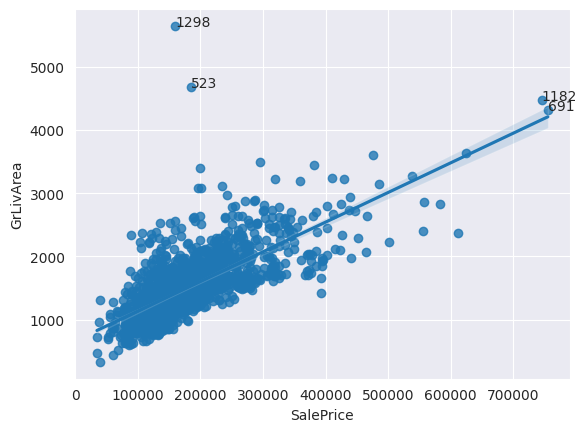

In [54]:
# visualize outliers
from seaborn import regplot
plt = regplot(x=data['SalePrice'], y=data['GrLivArea'])

for id, row in data.iterrows():
    if row['GrLivArea'] > 4_000:
        plt.text(row['SalePrice'], row['GrLivArea'], id)